In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import copy

In [46]:
# Check the time distribution of the intensity of NYC and Utrecht Data. 

# check NYC Yellow Taxi Data
# Load the data
NYC_PATH = 'NYC/Yellow_Taxi_Data/2016_03'
NYC_FILE_NAME = 'NYC_full_day_'

TARGET_DAY = 1

nyc_data = pd.read_csv(os.path.join(NYC_PATH, NYC_FILE_NAME + str(TARGET_DAY) + '.csv'))

nyc_data.head()

,ReqID,Oid,Did,ReqTime,Size
0,1,1867,438,0,1
1,2,1541,397,0,1
2,3,1915,1676,0,2
3,4,3942,2225,0,3
4,5,2122,2,0,5


In [24]:
def analyze_taxi_data(data, duration_of_interval, total_duration):
    """
    Analyze taxi request data to calculate request intensity and generate a visualization.
    
    Parameters:
    data (DataFrame): The taxi data with a 'ReqTime' column
    duration_of_interval (int): The interval duration in seconds
    total_duration (int): The total duration to analyze in hours
    
    Returns:
    list: The intensity data (counts per interval)
    """
    # Calculate intervals based on input parameters
    intervals_per_hour = 3600 // duration_of_interval
    total_intervals = total_duration * intervals_per_hour
    
    # Initialize the intensity list
    data_intensity = [0] * total_intervals
    
    # Count the number of rows in each interval
    for row in data.iterrows():
        req_time = row[1]['ReqTime']
        time_idx = int(req_time / duration_of_interval)
        if time_idx < total_intervals:  # Ensure index is within range
            data_intensity[time_idx] += 1
    
    # Create x-axis labels for time (hours:minutes)
    x_axis = []
    for hour in range(total_duration):
        for interval in range(intervals_per_hour):
            minutes = (interval * duration_of_interval) // 60
            x_axis.append(f"{hour}:{minutes:02d}")
    
    # Plot the intensity
    plt.figure(figsize=(24, 6))
    plt.xticks(rotation=90)
    plt.plot(x_axis, data_intensity)
    plt.xlabel(f'Time ({duration_of_interval//60}mins)')
    plt.ylabel('No. of Requests')
    plt.title('Taxi Request Intensity')
    plt.show()
    
    return data_intensity

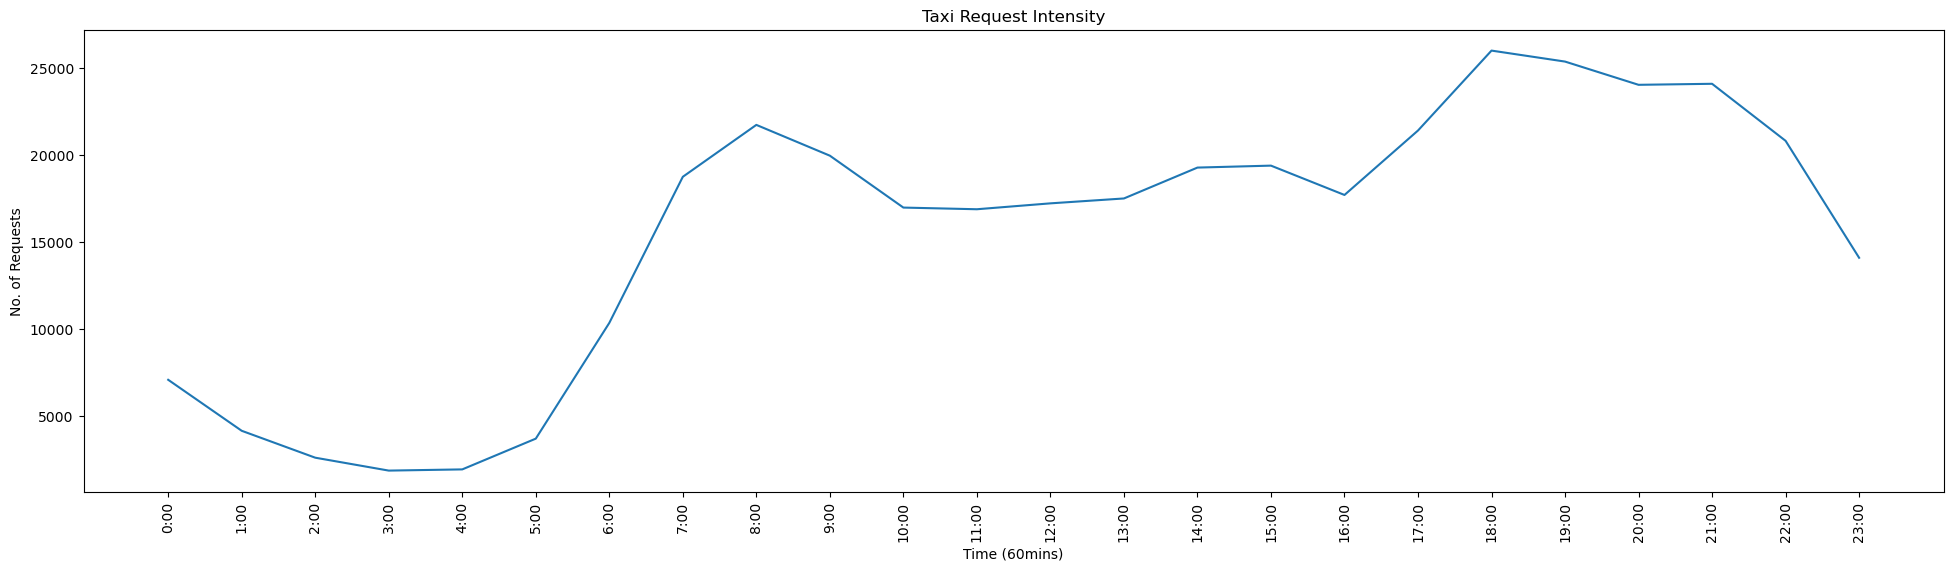

In [48]:
nyc_data_intensity = analyze_taxi_data(nyc_data, 3600, 24)

In [29]:
# Check the time distribution of the intensity of NYC and Utrecht Data. 

# check Utrect Data
# Load the data
CITY_PATH = 'Utrecht'
CITY_FILE_NAME = 'Utrecht_Requests'

TARGET_DAY = 1

utrecht_data = pd.read_csv(os.path.join(CITY_PATH, CITY_FILE_NAME + '.csv'))

utrecht_data.head()

,ReqID,Oid,Did,ReqTime,Size
0,1,6593,5605,0,2
1,2,5250,7064,0,1
2,3,9184,4255,0,2
3,4,7851,2712,1,2
4,5,5550,1899,1,1


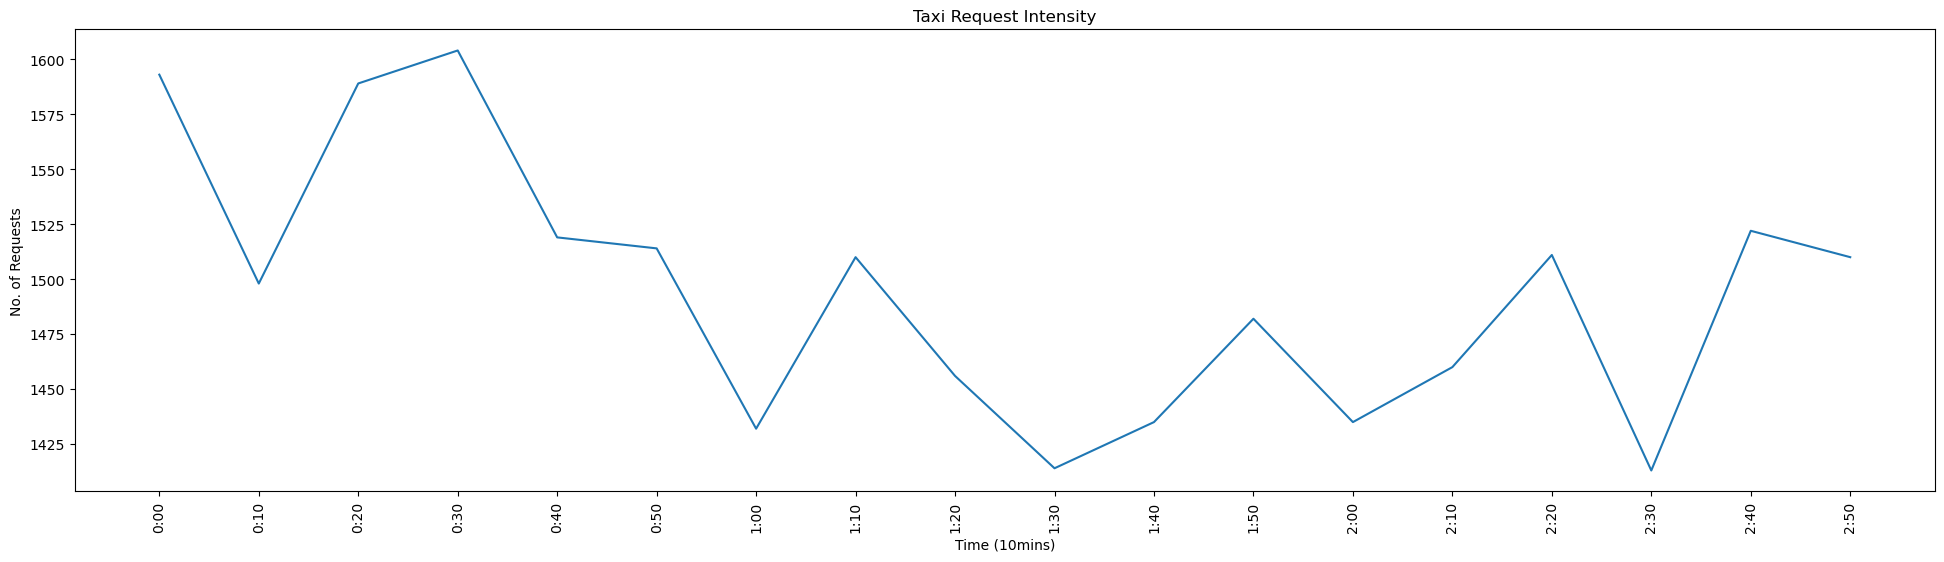

In [34]:
utrecht_data_intensity = analyze_taxi_data(utrecht_data, 600, 3)

In [42]:
def calculate_avg_trip_time(city_name, city_data):
    """
    Calculate the average trip time for a given city using its path time matrix.
    
    Parameters:
    city_name (str): Name of the city ('Utrecht' or 'NYC')
    city_data (DataFrame): DataFrame containing trip data with 'Oid' and 'Did' columns
    
    Returns:
    float: Average trip time in seconds
    """
    # Load all path time matrix based on city name
    if city_name == 'Utrecht':
        aptm_path = 'Utrecht/Utrecht_AllPathTimeMatrix.pkl'
    elif city_name == 'NYC':
        aptm_path = 'NYC/Manhattan_AllPathTimeMatrix.pickle'
    else:
        raise ValueError(f'Invalid City Name: {city_name}')
    
    # Load the path time matrix
    all_path_time_matrix = pd.read_pickle(aptm_path)
    
    # Calculate the average trip time
    city_df = copy.deepcopy(city_data)
    total_trip_time = 0
    
    for row in city_df.iterrows():
        Oid = row[1]['Oid']
        Did = row[1]['Did']
        trip_time = all_path_time_matrix.loc[Oid, Did]
        total_trip_time += trip_time
    
    avg_trip_time = total_trip_time / len(city_df)
    
    return avg_trip_time

In [43]:
utrecht_avg_trip_time = calculate_avg_trip_time('Utrecht', utrecht_data)
print(f'Average Trip Time: {utrecht_avg_trip_time:.2f} seconds')

Average Trip Time: 13.36 seconds


In [47]:
nyc_avg_trip_time = calculate_avg_trip_time('NYC', nyc_data)
print(f'Average Trip Time: {nyc_avg_trip_time:.2f} seconds')

Average Trip Time: 722.46 seconds
